In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from citipy import citipy

# Import the datetime module from the datetime library
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
print(lats)

[-84.43669489 -57.79986788  79.70964803 ...  77.49997771   9.51931957
 -43.86996367]


In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


620

In [6]:
# Starting URL for Weather Map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print('Beginning Data Retrieval        ')
print('--------------------------------')

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval        
--------------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | karasjok
Processing Record 5 of Set 1 | necochea
Processing Record 6 of Set 1 | krnov
Processing Record 7 of Set 1 | schmalkalden
Processing Record 8 of Set 1 | hobyo
Processing Record 9 of Set 1 | nuuk
Processing Record 10 of Set 1 | mahajanga
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | devrek
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | chuy
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | staroye drozhzhanoye
Processing Record 22 of Set 1 | karlskrona
Proces

Processing Record 38 of Set 4 | saint-pierre
Processing Record 39 of Set 4 | hasaki
Processing Record 40 of Set 4 | thompson
Processing Record 41 of Set 4 | ust-tsilma
Processing Record 42 of Set 4 | tual
Processing Record 43 of Set 4 | dordrecht
Processing Record 44 of Set 4 | madridejos
Processing Record 45 of Set 4 | oropesa
Processing Record 46 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 4 | nouadhibou
Processing Record 48 of Set 4 | satitoa
City not found. Skipping...
Processing Record 49 of Set 4 | pandamatenga
Processing Record 50 of Set 4 | beatrice
Processing Record 1 of Set 5 | mahadday weyne
City not found. Skipping...
Processing Record 2 of Set 5 | nador
Processing Record 3 of Set 5 | san policarpo
Processing Record 4 of Set 5 | paamiut
Processing Record 5 of Set 5 | port alfred
Processing Record 6 of Set 5 | sitka
Processing Record 7 of Set 5 | geraldton
Processing Record 8 of Set 5 | burnie
Processing Record 9 of Set 5 | conce

Processing Record 27 of Set 8 | faanui
Processing Record 28 of Set 8 | hofn
Processing Record 29 of Set 8 | cravinhos
Processing Record 30 of Set 8 | shakiso
Processing Record 31 of Set 8 | ahipara
Processing Record 32 of Set 8 | sibolga
Processing Record 33 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 34 of Set 8 | maniitsoq
Processing Record 35 of Set 8 | havre
Processing Record 36 of Set 8 | artyk
City not found. Skipping...
Processing Record 37 of Set 8 | srandakan
Processing Record 38 of Set 8 | opuwo
Processing Record 39 of Set 8 | henties bay
Processing Record 40 of Set 8 | hulan ergi
Processing Record 41 of Set 8 | veraval
Processing Record 42 of Set 8 | alotau
City not found. Skipping...
Processing Record 43 of Set 8 | limenaria
Processing Record 44 of Set 8 | kapuskasing
Processing Record 45 of Set 8 | half moon bay
Processing Record 46 of Set 8 | balkanabat
Processing Record 47 of Set 8 | orvault
Processing Record 48 of Set 8 | mugla
Processing Reco

Processing Record 13 of Set 12 | bose
Processing Record 14 of Set 12 | bokspits
City not found. Skipping...
Processing Record 15 of Set 12 | baykit
Processing Record 16 of Set 12 | hami
Processing Record 17 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 18 of Set 12 | shorkot
Processing Record 19 of Set 12 | gushikawa
Processing Record 20 of Set 12 | pizhanka
Processing Record 21 of Set 12 | oktyabrskiy
Processing Record 22 of Set 12 | chaa-khol
City not found. Skipping...
Processing Record 23 of Set 12 | ngunguru
Processing Record 24 of Set 12 | yavaros
Processing Record 25 of Set 12 | zemio
Processing Record 26 of Set 12 | bambanglipuro
Processing Record 27 of Set 12 | shakawe
Processing Record 28 of Set 12 | ulaanbaatar
Processing Record 29 of Set 12 | kincardine
Processing Record 30 of Set 12 | thinadhoo
Processing Record 31 of Set 12 | san rafael
Processing Record 32 of Set 12 | arman
Processing Record 33 of Set 12 | longlac
City not found. Skipping...
Process

In [8]:
# Convert the array of dictionaries to a Pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,54.81,62,9,9.06,NZ,2021-09-18 03:06:12
1,Cape Town,-33.9258,18.4232,52.88,78,0,1.99,ZA,2021-09-18 03:06:13
2,Tuktoyaktuk,69.4541,-133.0374,39.63,96,46,11.41,CA,2021-09-18 03:06:13
3,Karasjok,69.4719,25.5112,32.02,93,43,8.43,NO,2021-09-18 03:06:13
4,Necochea,-38.5473,-58.7368,57.04,77,69,12.73,AR,2021-09-18 03:06:14
5,Krnov,50.0897,17.7039,53.96,83,100,1.92,CZ,2021-09-18 03:06:14
6,Schmalkalden,50.7167,10.4500,52.56,86,27,1.39,DE,2021-09-18 03:06:14
7,Hobyo,5.3505,48.5268,77.59,83,91,19.06,SO,2021-09-18 03:06:15
8,Nuuk,64.1835,-51.7216,36.88,68,71,5.48,GL,2021-09-18 03:06:15
9,Mahajanga,-15.7167,46.3167,72.61,82,40,7.78,MG,2021-09-18 03:06:15


In [9]:
# Reorder data frame
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_date_df = city_data_df[new_column_order]
city_date_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2021-09-18 03:06:12,-46.6000,168.3333,54.81,62,9,9.06
1,Cape Town,ZA,2021-09-18 03:06:13,-33.9258,18.4232,52.88,78,0,1.99
2,Tuktoyaktuk,CA,2021-09-18 03:06:13,69.4541,-133.0374,39.63,96,46,11.41
3,Karasjok,NO,2021-09-18 03:06:13,69.4719,25.5112,32.02,93,43,8.43
4,Necochea,AR,2021-09-18 03:06:14,-38.5473,-58.7368,57.04,77,69,12.73


In [10]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_data into a csv.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

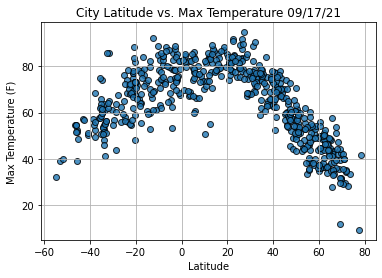

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor='black',
           linewidths=1,
           marker='o',
           alpha=0.8,
           label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig1.png')
            
# Show plot
plt.show()

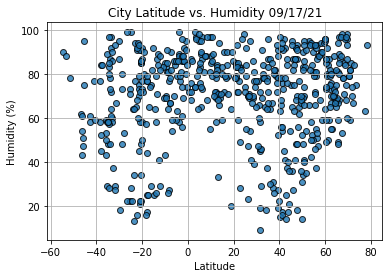

In [16]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor='black',
           linewidths=1,
           marker='o',
           alpha=0.8,
           label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig2.png')
            
# Show plot
plt.show()

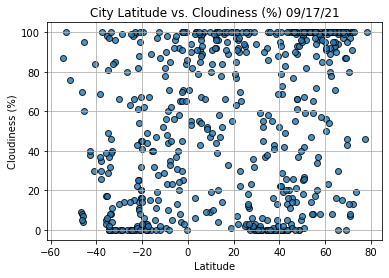

In [17]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor='black',
           linewidths=1,
           marker='o',
           alpha=0.8,
           label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) '+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig3.png')
            
# Show plot
plt.show()

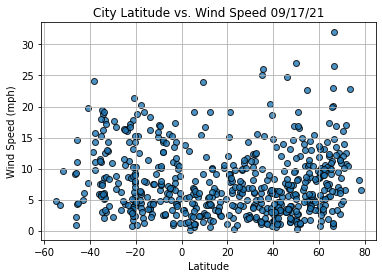

In [18]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor='black',
           linewidths=1,
           marker='o',
           alpha=0.8,
           label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig4.png')
            
# Show plot
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

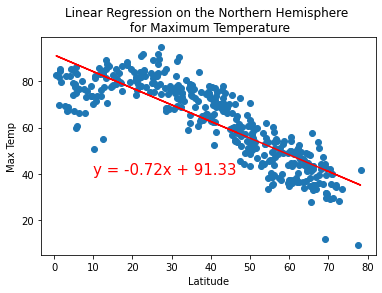

In [40]:
# Linear regression on the northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

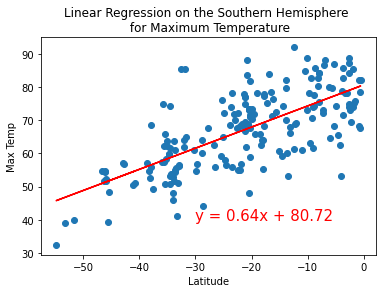

In [41]:
# Linear regression on the sourthern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-30,40))

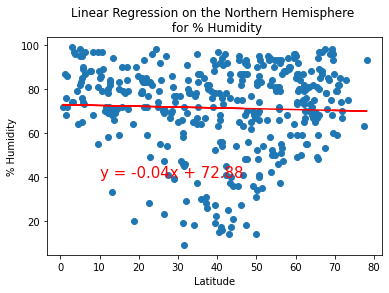

In [42]:
# Linear regression on the northern hemisphere for humidity
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(10,40))

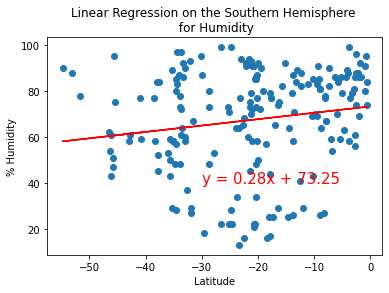

In [43]:
# Linear regression on the southern hemisphere for humidity
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-30,40))

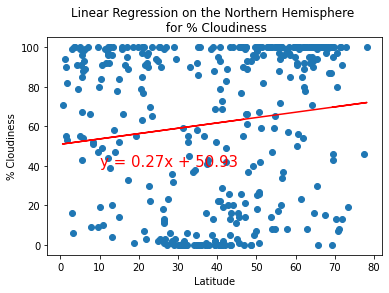

In [44]:
# Linear regression on the northern hemisphere for cloudiness
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,40))

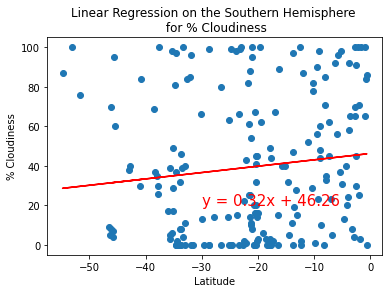

In [47]:
# Linear regression on the southern hemisphere for cloudiness
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-30,20))

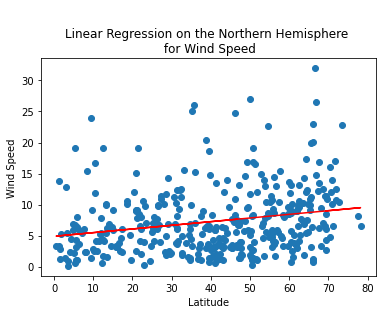

In [48]:
# Linear regression on the northern hemisphere for wind speed
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,40))

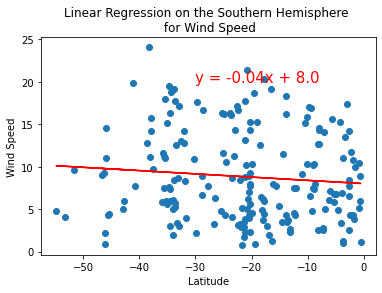

In [49]:
# Linear regression on the southern hemisphere for wind speed
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-30,20))